In [1]:
#import libraries here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, roc_auc_score, accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [2]:
train_data = pd.read_csv("fashion-mnist_train.csv")
test_data = pd.read_csv("fashion-mnist_test.csv")

In [3]:
train_labels = train_data['label'] # the feature we would like to predict, the label of picture
data = train_data.drop(['label'], axis = 1) # we will drop y from x, because we want to predict it

test_labels = test_data['label'] # the feature we would like to predict, the label of picture
test = test_data.drop(['label'], axis = 1) # we will drop y from x, because we want to predict it

In [4]:
#train-val split
X_train, X_val, y_train, y_val = train_test_split(data, train_labels, test_size=0.2, random_state=18)
X_test = test.copy()

In [5]:
#normalize
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

In [6]:
pca = PCA() # all 784 features
pca.fit(X_train)

PCA()

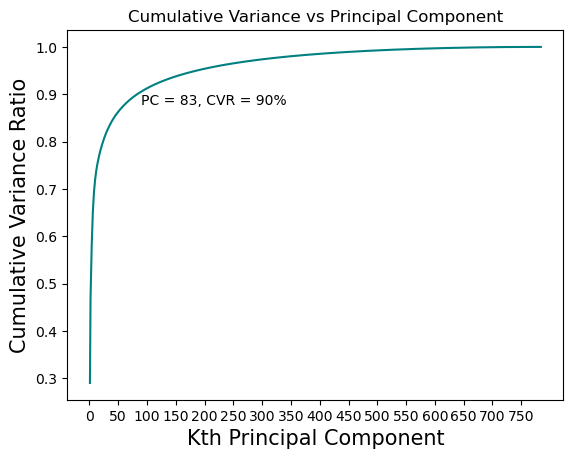

In [7]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
first_evec_90 = np.where(cumulative_variance_ratio >= 0.9)[0][0]

# Plot cumulative explained variance ratio
PCs = list(range(1, len(explained_variance_ratio)+1))
plt.plot(PCs, np.cumsum(explained_variance_ratio), color= 'teal')
plt.annotate("PC = "+str(first_evec_90+1)+", CVR = 90%", (90, 0.9), va='top', ha='left')
plt.title('Cumulative Variance vs Principal Component')
plt.xticks(np.arange(0,len(PCs), 50))
plt.xlabel('Kth Principal Component', fontsize = 15)
plt.ylabel('Cumulative Variance Ratio', fontsize = 15)
plt.show()

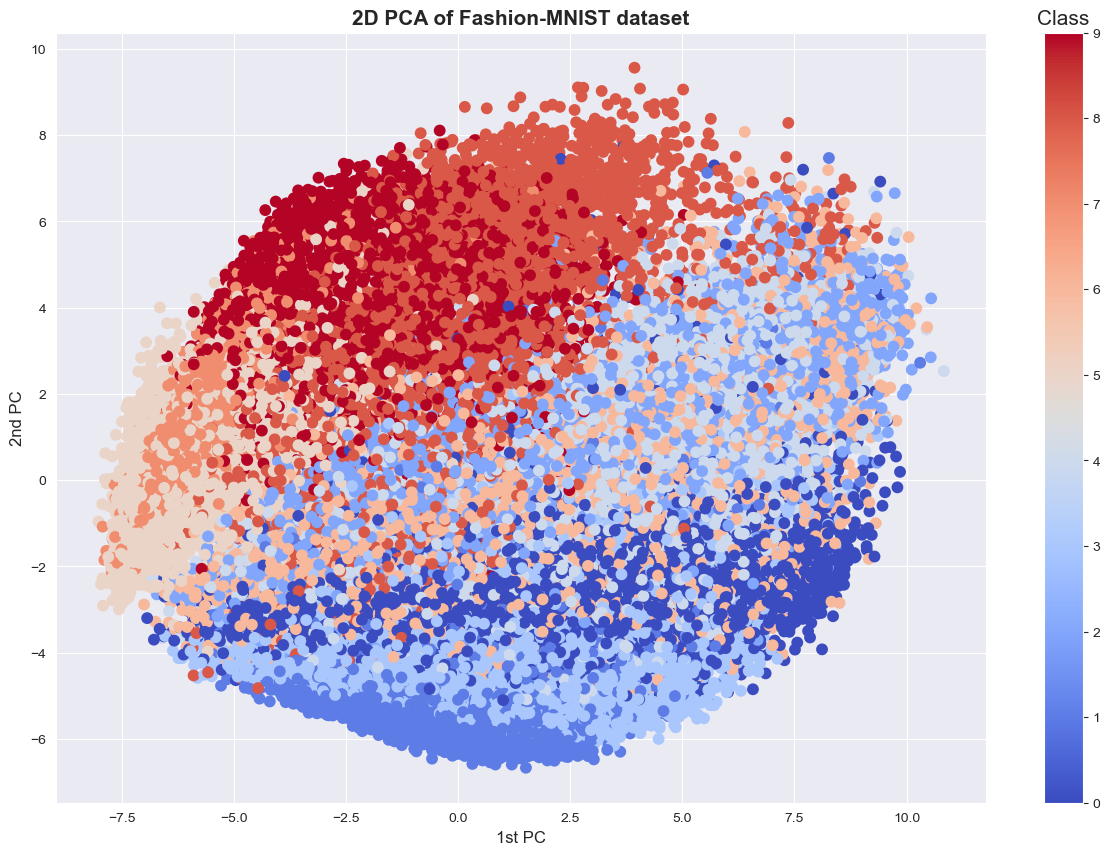

In [8]:
sns.set_style("darkgrid")

# Initialize PCA object
pca = PCA(n_components=0.8)

# Fit PCA to normalized data with no components
fitted_2D = pca.fit_transform(X_train)

plt.figure(figsize=(15,10))

sc = plt.scatter(fitted_2D.T[0], fitted_2D.T[1], c=y_train, cmap=plt.cm.coolwarm, alpha=1, lw=2.5)
clb = plt.colorbar(sc)
clb.ax.set_title('Class', fontsize=15)
plt.xlabel("1st PC", fontsize=12)
plt.ylabel("2nd PC", fontsize=12)
plt.title('2D PCA of Fashion-MNIST dataset', fontweight = 'bold', fontsize=15)

plt.show()

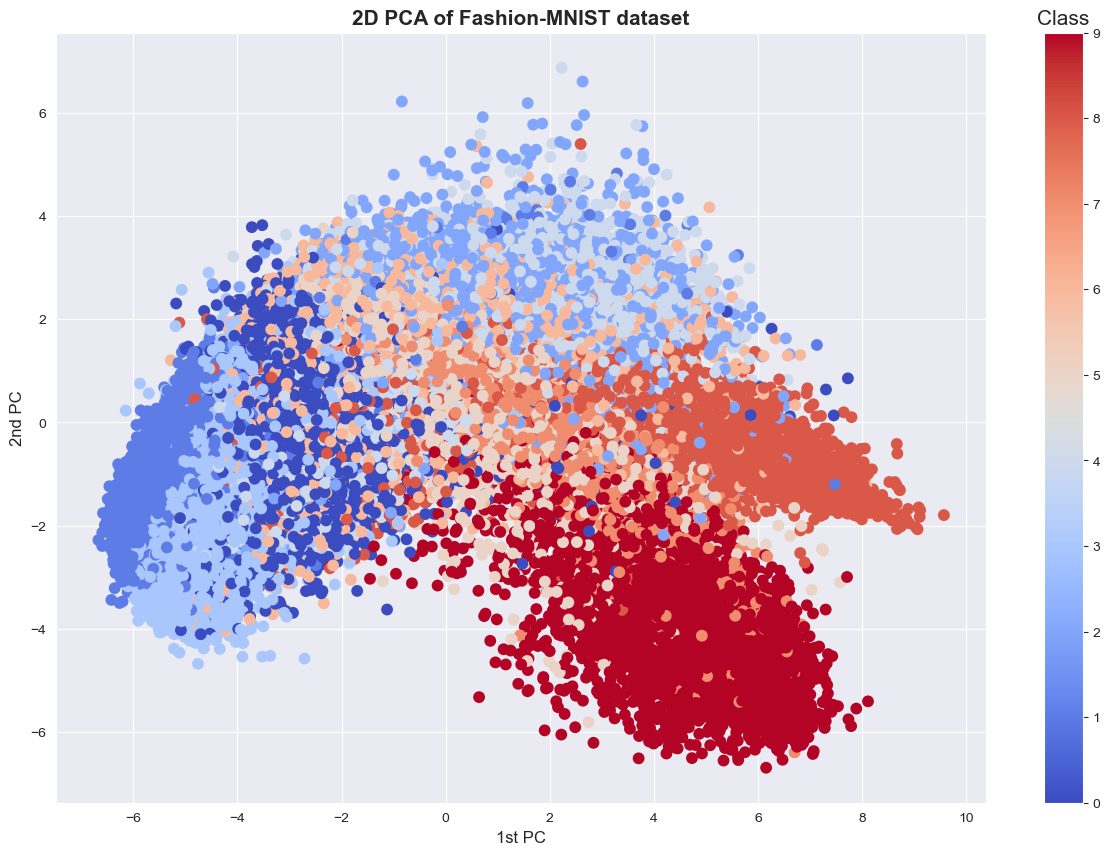

In [9]:
sns.set_style("darkgrid")

plt.figure(figsize=(15,10))

sc = plt.scatter(fitted_2D.T[1], fitted_2D.T[2], c=y_train, cmap=plt.cm.coolwarm, alpha=1, lw=2.5)
clb = plt.colorbar(sc)
clb.ax.set_title('Class', fontsize=15)
plt.xlabel("1st PC", fontsize=12)
plt.ylabel("2nd PC", fontsize=12)
plt.title('2D PCA of Fashion-MNIST dataset', fontweight = 'bold', fontsize=15)

plt.show()

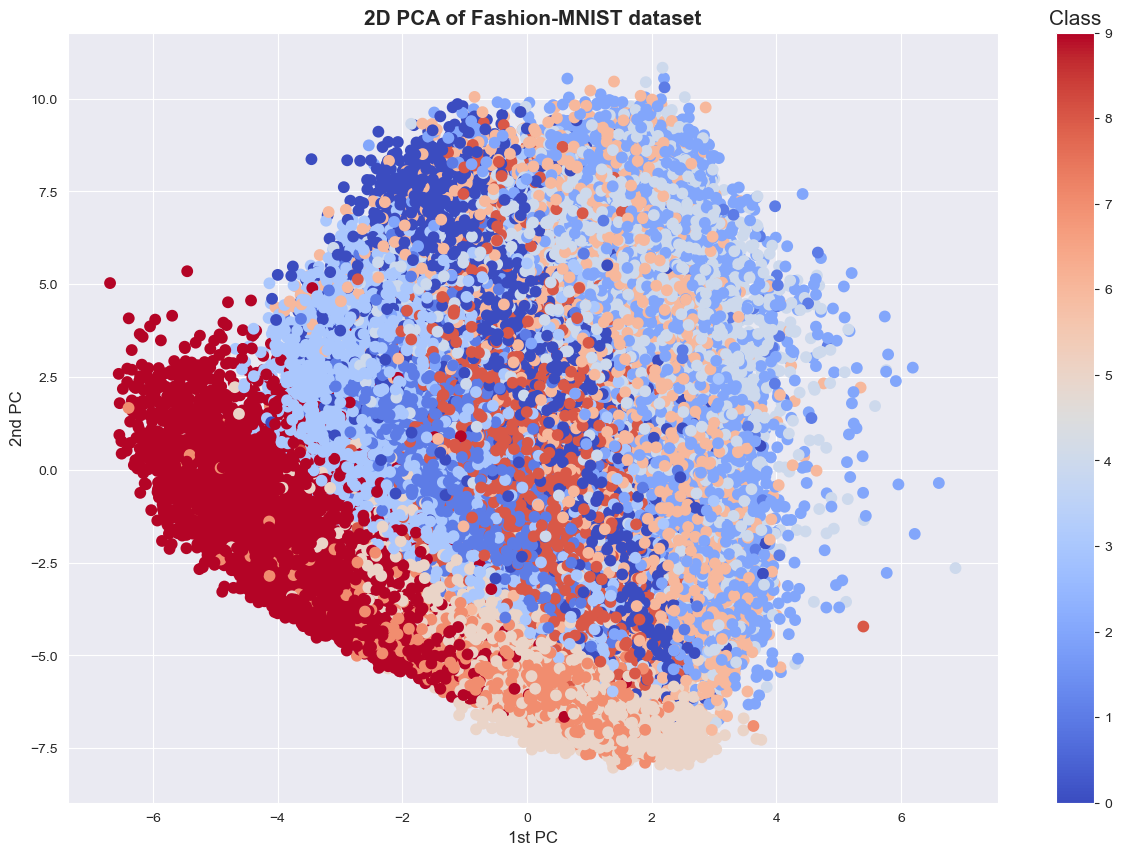

In [10]:
sns.set_style("darkgrid")

plt.figure(figsize=(15,10))

sc = plt.scatter(fitted_2D.T[2], fitted_2D.T[0], c=y_train, cmap=plt.cm.coolwarm, alpha=1, lw=2.5)
clb = plt.colorbar(sc)
clb.ax.set_title('Class', fontsize=15)
plt.xlabel("1st PC", fontsize=12)
plt.ylabel("2nd PC", fontsize=12)
plt.title('2D PCA of Fashion-MNIST dataset', fontweight = 'bold', fontsize=15)

plt.show()

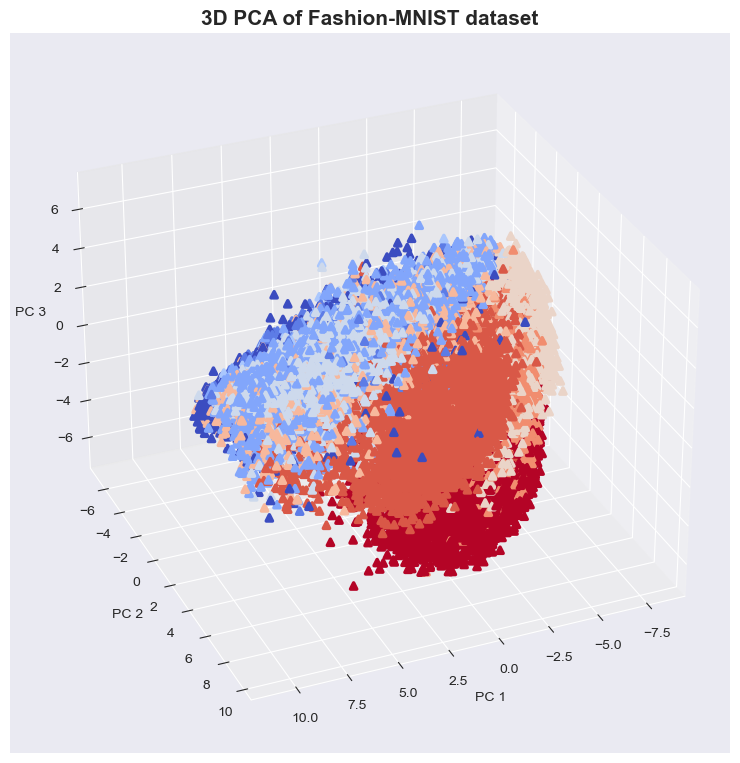

In [11]:
sns.set_style("darkgrid")
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(fitted_2D[:, 0], fitted_2D[:, 1], fitted_2D[:, 2], c=y_train, marker ="^", cmap=plt.cm.coolwarm, alpha=1, lw=2.5)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

# title of the plot
plt.title('3D PCA of Fashion-MNIST dataset', fontweight = 'bold', fontsize=15)

plt.subplots_adjust(left=0.01, right=0.99, bottom=0.05, top=0.95)
ax.view_init(elev=30, azim=67)

plt.show()

### Boost Algorithms

#### AdaBoost

In [12]:
randForest = RandomForestClassifier(n_estimators=100, max_depth=45, random_state=0).fit(X_train, y_train)
ada = AdaBoostClassifier(n_estimators=100,learning_rate= 0.1, estimator=randForest)
ada.fit(X_train, y_train)
ada

AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=45,
                                                    random_state=0),
                   learning_rate=0.1, n_estimators=100)

In [13]:
y_pred = ada.predict(X_val)
ada_acc = accuracy_score(y_val, y_pred)
ada_acc

0.8845

In [14]:
print (classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1207
           1       0.99      0.97      0.98      1208
           2       0.79      0.83      0.81      1195
           3       0.90      0.92      0.91      1203
           4       0.78      0.85      0.82      1191
           5       0.98      0.96      0.97      1159
           6       0.73      0.57      0.64      1204
           7       0.93      0.96      0.94      1246
           8       0.96      0.97      0.96      1177
           9       0.96      0.96      0.96      1210

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000



#### XGBoost

In [15]:
xgb = XGBClassifier(use_label_encoder =False)
xgb.fit(X_train, y_train)
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [16]:
y_pred = xgb.predict(X_val)
xgb_acc = accuracy_score(y_val, y_pred)
xgb_acc

0.9055833333333333

In [17]:
print (classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1207
           1       1.00      0.98      0.99      1208
           2       0.83      0.84      0.84      1195
           3       0.92      0.92      0.92      1203
           4       0.84      0.87      0.85      1191
           5       0.99      0.97      0.98      1159
           6       0.74      0.69      0.72      1204
           7       0.95      0.97      0.96      1246
           8       0.98      0.97      0.97      1177
           9       0.97      0.97      0.97      1210

    accuracy                           0.91     12000
   macro avg       0.91      0.91      0.91     12000
weighted avg       0.91      0.91      0.91     12000

